## Reading Files

In [110]:
import pandas as pd

products_df = pd.read_csv('/Users/wangz/Desktop/PRODUCTS_TAKEHOME.csv')
transaction_data = pd.read_csv('/Users/wangz/Desktop/TRANSACTION_TAKEHOME.csv') 
user_data = pd.read_csv('/Users/wangz/Desktop/USER_TAKEHOME.csv')

## Product Table

* CATEGORY_1: Broad category of the product (e.g., "Health & Wellness," "Snacks"). There are 27 unique values
  
* CATEGORY_2: Subcategory of products, with 121 unique entries like "Sexual Health" or "Puffed Snacks."
  
* CATEGORY_3: Further detailed classification of products. For example, "Conductivity Gels & Lotions" under "Sexual Health."
  
* 
CATEGORY_4: A more specific product type with only 67,459 entries out of 845,441 recor.
  
* MANUFACTURER: The company that produced the product. There are 4,354 unique manufacturers.
  
* BRAND: Product brand, with 8,122 unique values (e.g., "COLGATE," "MAPLE HOLISTICS").
  
* BARCODE: A unique numerical identifier for products, but some values seem to be placeholders.

The dataset contains 845,441 total entries. Given that CATEGORY_4 is missing for the majority of records and that the other category levels (CATEGORY_1, CATEGORY_2, and CATEGORY_3) provide sufficient classification detail, I recommend dropping CATEGORY_4 from the analysis analysis

In [121]:
## PRODUCT TABLE
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845552 entries, 0 to 845551
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   CATEGORY_1    845441 non-null  object 
 1   CATEGORY_2    844128 non-null  object 
 2   CATEGORY_3    784986 non-null  object 
 3   CATEGORY_4    67459 non-null   object 
 4   MANUFACTURER  619078 non-null  object 
 5   BRAND         619080 non-null  object 
 6   BARCODE       841527 non-null  float64
dtypes: float64(1), object(6)
memory usage: 45.2+ MB


In [40]:
# Calculate the number of unique values in CATEGORY_1

category_1_unique = products_df['CATEGORY_1'].nunique()
category_1_unique

(845552, 27, 121, 344, 127, 4354, 8122, 841527, 67459)

In [123]:
# Calculate the number of unique values in CATEGORY_2

category_2_unique = products_df['CATEGORY_2'].nunique()
category_2_unique

121

In [125]:
# Calculate the number of unique values in CATEGORY_3

category_3_unique = products_df['CATEGORY_3'].nunique()
category_3_unique

344

In [127]:
# Calculate the number of unique values in CATEGORY_4

category_4_unique = products_df['CATEGORY_4'].nunique()
category_4_unique

127

In [129]:
# Calculate the number of unique values in MANUFACTURER

manufacturer_unique = products_df['MANUFACTURER'].nunique()
manufacturer_unique

4354

In [131]:
# Calculate the number of unique values in BRAND

brand_unique = products_df['BRAND'].nunique()
brand_unique

8122

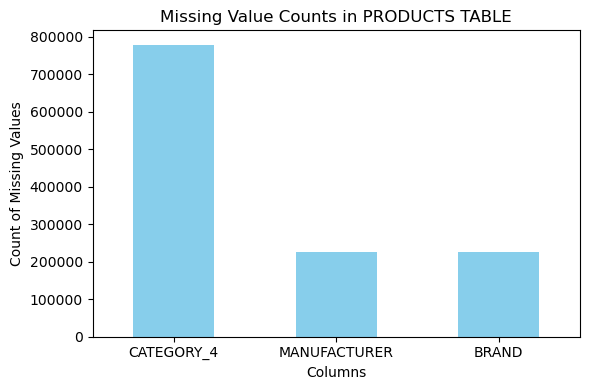

In [12]:
import matplotlib.pyplot as plt

# Counting the missing values in the relevant columns for the PRODUCTS_TAKEHOME.csv
products_missing_counts = products_df[['CATEGORY_4', 'MANUFACTURER', 'BRAND']].isnull().sum()

# Plotting the missing value counts
plt.figure(figsize=(6, 4))
products_missing_counts.plot(kind='bar', color='skyblue')
plt.title("Missing Value Counts in PRODUCTS TABLE")
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

## Transaction Table

* RECEIPT_ID: A unique identifier for each transaction

* PURCHASE_DATE: The date when the purchase was made.

* SCAN_DATE: The timestamp of when the transaction was scanned into the system.

* STORE_NAME: The name of the store where the purchase occurred. There are 954 unique stores represented.

* USER_ID: A unique identifier for each customer, with 17,694 unique users in the dataset.

* BARCODE: A numerical product identifier. There are 44,238 entries for this field, though some records are missing barcode data.

* 
FINAL_QUANTITY: The number of items purchased in the transaction This field has values such as '1' and 'zero'.

* FINAL_SALE: The total sale amount for the transaction. Some entries are missing or appear to be placeholders (e.g., empty values).

  The dataset consists of 50,000 transaction records. It can be used to analyze shopping behaviors, store performance, or customer trends.

Given the data structure:

I recommend dropping rows with missing BARCODE values, as these transactions cannot be linked to specific products.

Additionally, I suggest removing rows where FINAL_SALE is zero. This only accounts for 480 rows, so dropping them will ensure more accurate analysis without losing significant data.

However, there is a noteworthy situation where FINAL_QUANTITY is 'zero' while FINAL_SALE has a value. This accounts for 12,500 rows out of the 50,000 records. These transactions cannot be ignored, and further investigation is needed to understand the context—whether it involves bulk discounts, returns, or some other transactional nuance. Dropping these rows is not advisable until the reason behind this discrepancy is clarifie.

In [112]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RECEIPT_ID      50000 non-null  object 
 1   PURCHASE_DATE   50000 non-null  object 
 2   SCAN_DATE       50000 non-null  object 
 3   STORE_NAME      50000 non-null  object 
 4   USER_ID         50000 non-null  object 
 5   BARCODE         44238 non-null  float64
 6   FINAL_QUANTITY  50000 non-null  object 
 7   FINAL_SALE      50000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.1+ MB


In [114]:
# Calculate the unique counts for STORE_NAME
store_name_unique = transaction_data['STORE_NAME'].nunique()

store_name_unique

954

In [116]:
## Calculate the unique counts for STORE_NAME and USER_ID
user_id_unique = transaction_data['USER_ID'].nunique()

user_id_unique

17694

In [52]:
# Unique values in the 'FINAL_QUANTITY' column, zero is a string not a number need replace
final_quantity_unique_values = transaction_df['FINAL_QUANTITY'].unique()

final_quantity_unique_values


array(['1', 'zero', '2', '3', '4', '4.55', '2.83', '2.34', '0.46', '7',
       '18', '12', '5', '2.17', '0.23', '8', '1.35', '0.09', '2.58',
       '1.47', '16', '0.62', '1.24', '1.4', '0.51', '0.53', '1.69', '6',
       '2.39', '2.6', '10', '0.86', '1.54', '1.88', '2.93', '1.28',
       '0.65', '2.89', '1.44', '2.75', '1.81', '276', '0.87', '2.1',
       '3.33', '2.54', '2.2', '1.93', '1.34', '1.13', '2.19', '0.83',
       '2.61', '0.28', '1.5', '0.97', '0.24', '1.18', '6.22', '1.22',
       '1.23', '2.57', '1.07', '2.11', '0.48', '9', '3.11', '1.08',
       '5.53', '1.89', '0.01', '2.18', '1.99', '0.04', '2.25', '1.37',
       '3.02', '0.35', '0.99', '1.8', '3.24', '0.94', '2.04', '3.69',
       '0.7', '2.52', '2.27'], dtype=object)

In [58]:
# Find rows where FINAL_QUANTITY is 'zero' and FINAL_SALE has a value
zero_quantity_with_sale = transaction_df[(transaction_df['FINAL_QUANTITY'] == 'zero') & (transaction_df['FINAL_SALE'] != '')]

# Count the rows that match this condition
print(len(zero_quantity_with_sale))


12500


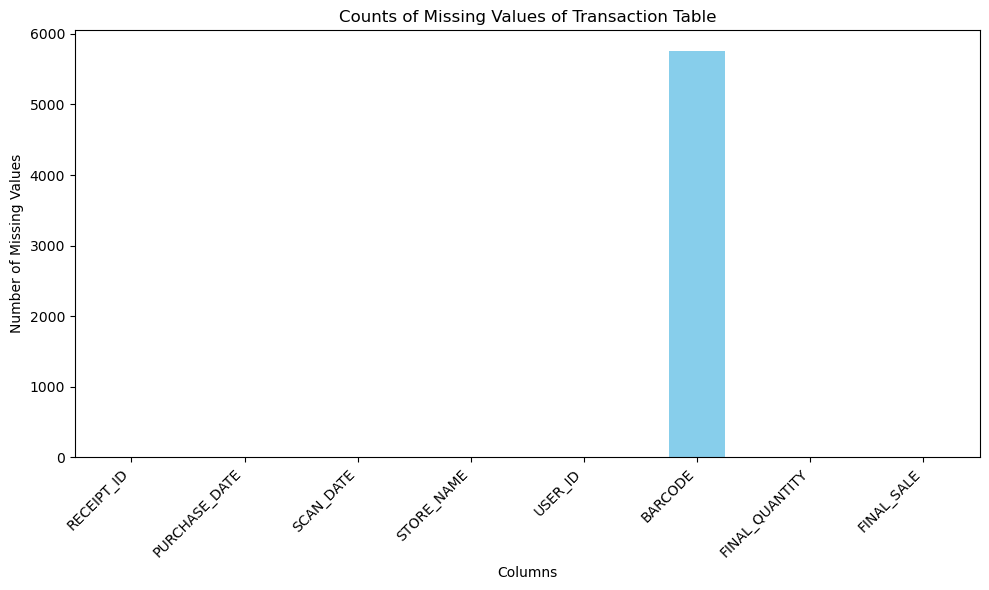

In [20]:
# Calculate the count of missing values for each column
missing_values = transactions_df.isnull().sum()

# Create a bar chart for the counts of missing values
plt.figure(figsize=(10,6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Counts of Missing Values of Transaction Table')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()



## User Table

* ID: A unique identifier for each user.

* CREATED_DATE: The date and time when the user account was created.

* BIRTH_DATE: The user's date of birth, available for 96,325 users. The most frequent date is "1970-01-01," which may indicate placeholder or missing data.

* STATE: The U.S. state where the user is located. There are 95,188 entries, and 52 unique states are represented, with "TX" being the most frequent state.

* LANGUAGE: The language preference of the user. The dataset contains two language codes: "en" (English) and "es-419" (Latin American Spanish). English is the most common, used by 63,403 users.

*  GENDER: The user's gender, recorded for 94,108 entries. There are 11 unique values for gender, with "female" being the most common.

The dataset consists of 100,000 users. While some fields, such as BIRTH_DATE, STATE, and GENDER, have missing or placeholder values, it’s recommended to retain all user data for analysis. Therefore, filling missing values with "unknown" is suggested rather than dropping them, to ensure every user linked to transactions is included.

I recommend dropping the LANGUAGE column, as it may not significantly impact the analysis in this context.

In [76]:
users_df.head(), users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ID            100000 non-null  object
 1   CREATED_DATE  100000 non-null  object
 2   BIRTH_DATE    96325 non-null   object
 3   STATE         95188 non-null   object
 4   LANGUAGE      69492 non-null   object
 5   GENDER        94108 non-null   object
dtypes: object(6)
memory usage: 4.6+ MB


(                         ID               CREATED_DATE  \
 0  5ef3b4f17053ab141787697d  2020-06-24 20:17:54.000 Z   
 1  5ff220d383fcfc12622b96bc  2021-01-03 19:53:55.000 Z   
 2  6477950aa55bb77a0e27ee10  2023-05-31 18:42:18.000 Z   
 3  658a306e99b40f103b63ccf8  2023-12-26 01:46:22.000 Z   
 4  653cf5d6a225ea102b7ecdc2  2023-10-28 11:51:50.000 Z   
 
                   BIRTH_DATE STATE LANGUAGE  GENDER  
 0  2000-08-11 00:00:00.000 Z    CA   es-419  female  
 1  2001-09-24 04:00:00.000 Z    PA       en  female  
 2  1994-10-28 00:00:00.000 Z    FL   es-419  female  
 3                        NaN    NC       en     NaN  
 4  1972-03-19 00:00:00.000 Z    PA       en  female  ,
 None)

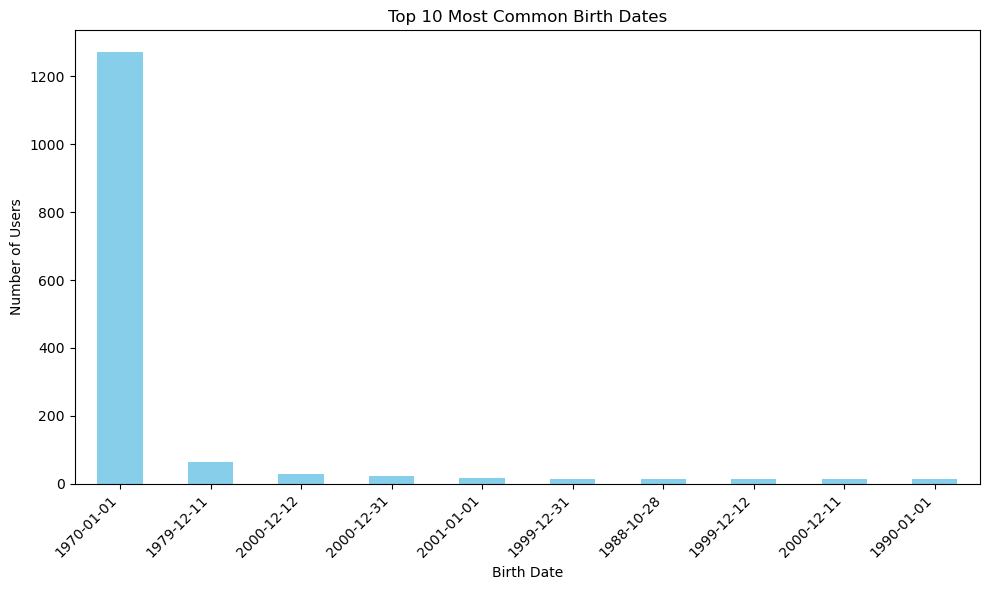

In [106]:
import matplotlib.pyplot as plt

# Select the top 10 most common birth dates
top_10_birth_dates.index = top_10_birth_dates.index.str.slice(0, 10)

# Plot the adjusted top 10 birth dates
plt.figure(figsize=(10, 6))
top_10_birth_dates.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Common Birth Dates")
plt.xlabel("Birth Date")
plt.ylabel("Number of Users")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [102]:
# STATE: Non-null count, unique count, and most common state
state_unique_count = user_data['STATE'].nunique()
most_common_state = user_data['STATE'].mode()[0]

state_unique_count, most_common_state

(52, 'TX')

In [100]:
# LANGUAGE: Non-null count, unique count, and most common language
language_unique_values = user_data['LANGUAGE'].unique()
most_common_language = user_data['LANGUAGE'].mode()[0]

language_unique_values, most_common_language

(array(['es-419', 'en', nan], dtype=object), 'en')

In [90]:
# GENDER: Unique count, and most common gender
gender_unique_count = user_data['GENDER'].nunique()
most_common_gender = user_data['GENDER'].mode()[0]

gender_unique_count, most_common_gender

(94108, 11, 'female')

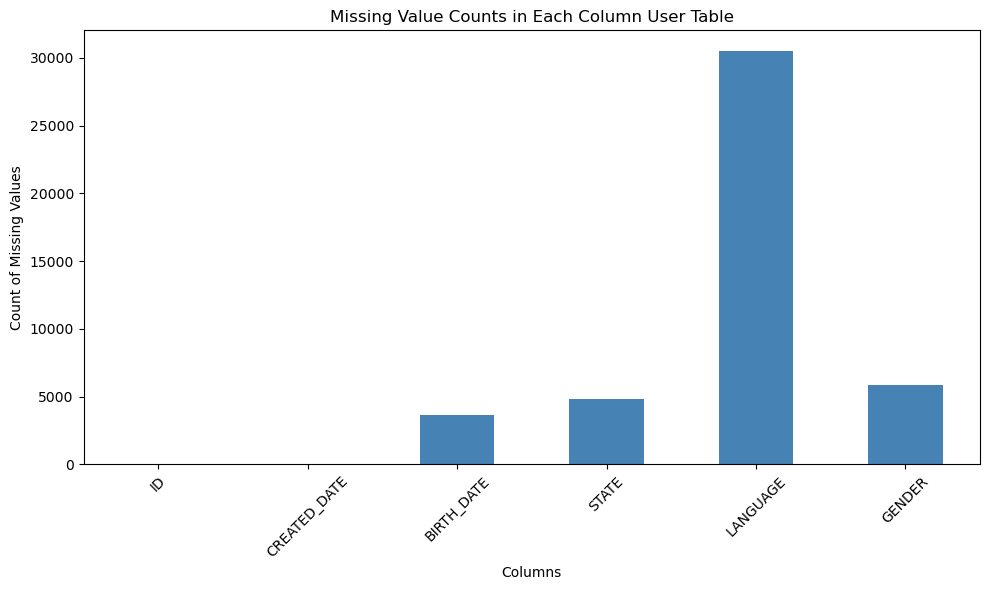

In [22]:
# missing values in each column in the USER_TAKEHOME.csv
users_missing_counts_all = users_df.isnull().sum()

# Plotting the missing value counts for all columns
plt.figure(figsize=(10, 6))
users_missing_counts_all.plot(kind='bar', color='steelblue')
plt.title("Missing Value Counts in Each Column User Table")
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


fa